# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [58]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.isna().mean()
df.groupby('YEAR')['AVG_READING_4_SCORE'].mean()
df.groupby('STATE')['AVG_READING_4_SCORE'].mean()
#replacing nan values with mean scores for each state
df['AVG_READING_4_SCORE'] = df.groupby('STATE')['AVG_READING_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
df['AVG_MATH_4_SCORE'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df.isna().mean()
#Fill nan values for total expenditure for feature engineering
df_clean = df.dropna(subset=['TOTAL_EXPENDITURE'])

X = df_clean['YEAR'].values.reshape(-1, 1)
y = df_clean['TOTAL_EXPENDITURE'].values
model = LinearRegression().fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

df['TOTAL_EXPENDITURE'] = df.apply(
    lambda row: slope * row['YEAR'] + intercept if pd.isna(row['TOTAL_EXPENDITURE']) else row['TOTAL_EXPENDITURE'],
    axis=1
)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [60]:
df.YEAR.max() - df.YEAR.min()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [30]:
Michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean()
Ohio_avg = df[df['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean()
print(f"Michigan Avg: {Michigan_avg}")
print(f"Ohio Avg: {Ohio_avg}")
#Ohio has the higher avg

Michigan Avg: 217.83333333333334
Ohio Avg: 223.1818181818182


Find the average for your chosen test across all states in 2019

In [33]:
df.groupby('STATE')['AVG_READING_4_SCORE'].mean()

STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

For each state, find a maximum value for your chosen test score

In [35]:
df.groupby('STATE')['AVG_READING_4_SCORE'].max().max()

237.0

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [54]:

df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL_EST']
display(df)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2.653798e+06,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.000000,NaN,3.627221
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,9.724880e+05,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,209.888889,NaN,7.939520
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3.401580e+06,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.000000,NaN,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1.743022e+06,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.000000,NaN,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,2.713883e+07,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.000000,NaN,5.164536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,1.495692e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.000000,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,1.495692e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.000000,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,1.495692e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.000000,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,1.495692e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.000000,267.0,NaN


Feature engineering justification: 
More money = more resources/better teachers for students, so it might have a impact on test scores

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

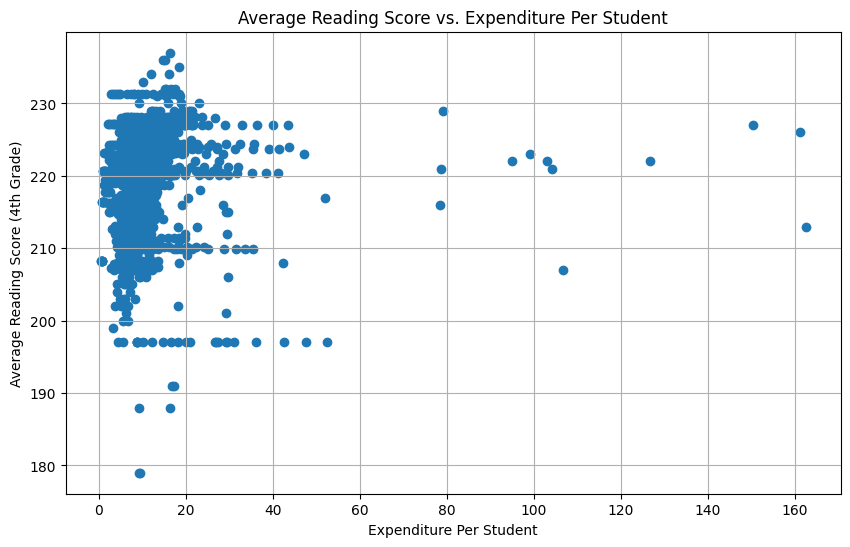

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df['EXPENDITURE_PER_STUDENT'], df['AVG_READING_4_SCORE'])

plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Reading Score (4th Grade)')
plt.title('Average Reading Score vs. Expenditure Per Student')
plt.grid(True)

plt.show()

Average Reading Score vs. Expenditure Per Student
No/weak correlation

**Visualization 2**

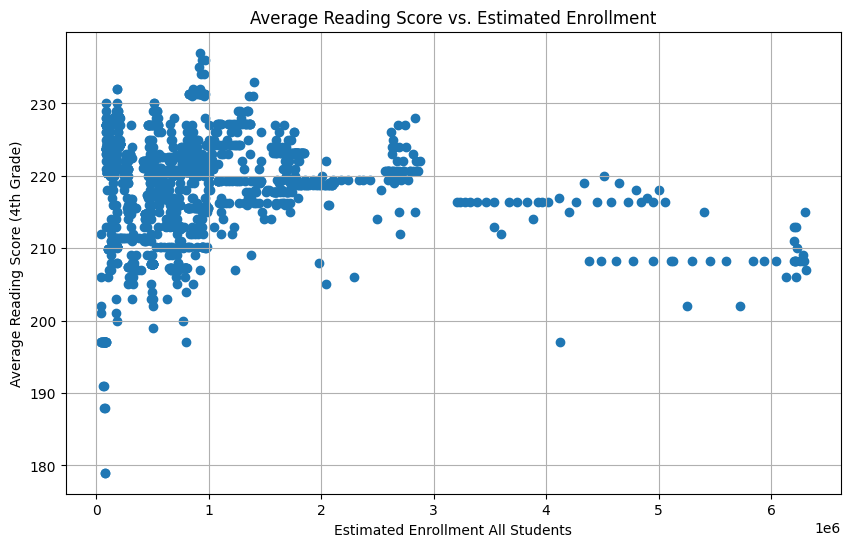

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ENROLL_ALL_EST'], df['AVG_READING_4_SCORE'])

plt.xlabel('Estimated Enrollment All Students')
plt.ylabel('Average Reading Score (4th Grade)')
plt.title('Average Reading Score vs. Estimated Enrollment')
plt.grid(True)

plt.show()

Average Reading Score vs. Estimated Enrollment
Also no/weak correlation

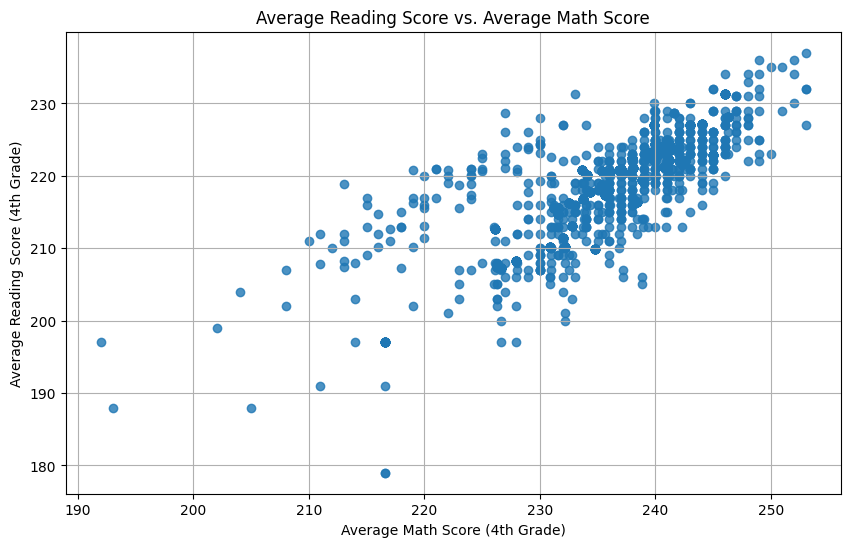

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AVG_MATH_4_SCORE'], df['AVG_READING_4_SCORE'])

plt.xlabel('Average Math Score (4th Grade)')
plt.ylabel('Average Reading Score (4th Grade)')
plt.title('Average Reading Score vs. Average Math Score')
plt.grid(True)

plt.show()

Average Reading Score vs. Average Math Score
Tutorial one showed that 8th grade Reading and Math scores were strongly correlated so I tried it out with 4th graders. The results are not as strong but they are still better the previous two.


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [66]:
from sklearn.model_selection import train_test_split

In [81]:
# We know that ENROLL_ALL_EST and EXPENDITURE_PER_STUDENT have little correlation
# Let’s see how the Random Forest Regressor handles this and what it shows about feature importance
X = df[['AVG_MATH_4_SCORE', 'ENROLL_ALL_EST', 'EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [83]:
# import your sklearn class here
#We'll use RandomForestRegressor as it was what the kaggle tutorial used when I did it a while ago
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [84]:
# create your model here
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [85]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [93]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Feature Importances: {model.feature_importances_}")

Mean Absolute Error: 1.7690601462030195
R-squared: 0.7691516158090821
Feature Importances: [0.71316922 0.23449516 0.05233562]
1.7690601462030195


Mean Absolute Error: 1.7690601462030195
R-squared: 0.7691516158090821
Feature Importances: [0.71316922 0.23449516 0.05233562]

Model works well on the training set and generalizes well to the test set. 
A little better MAE than tutorial 1

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

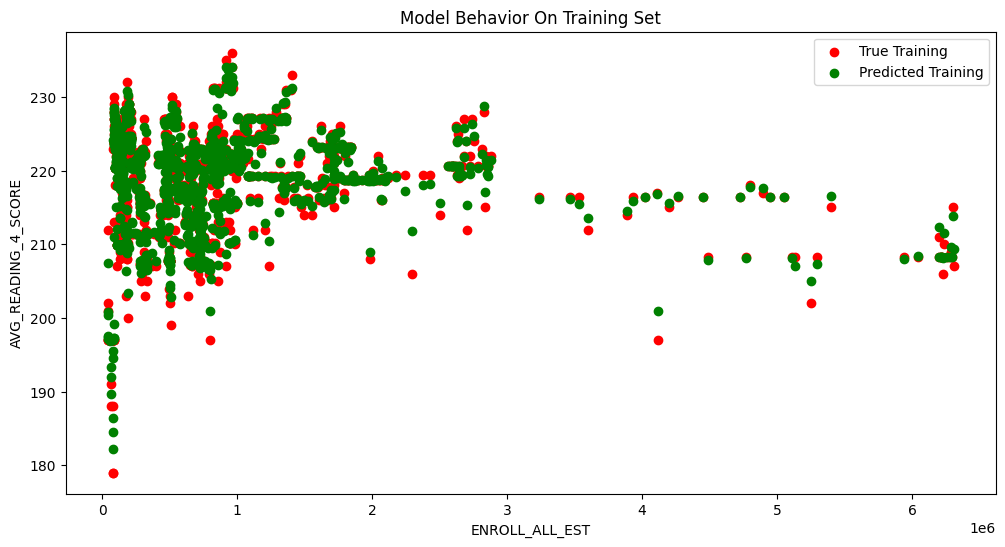

In [90]:
col_name = 'ENROLL_ALL_EST'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

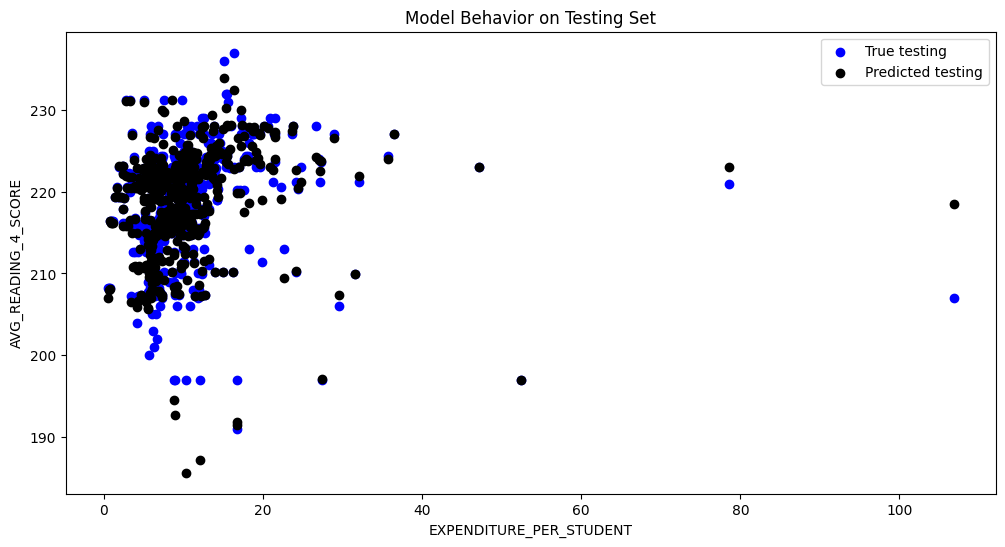

In [92]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")